In [29]:
# load pretty jupyter's magics
%load_ext pretty_jupyter

The pretty_jupyter extension is already loaded. To reload it, use:
  %reload_ext pretty_jupyter


# Types of Image Segmentation

## Set environment

In [30]:
# Get common packages
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data

# Set image path
img_name = 'river'
img_path = '../data/images/camera-1284459_640.jpg'
original_image = np.array(Image.open(img_path))
# original_image = data.coffee()
# original_image = data.astronaut()

# define common function
def plot_image_comparision(img_1, img_2, draw_colorbar:bool=False):
    plt.figure(figsize=(15, 15))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_1)

    plt.subplot(1, 2, 2)
    plt.imshow(img_2, cmap="gray")

    if draw_colorbar:
        colorbar = plt.imshow(img_2)
        plt.colorbar(colorbar, fraction=0.046, pad=0.04)



## Color spaces manipulation

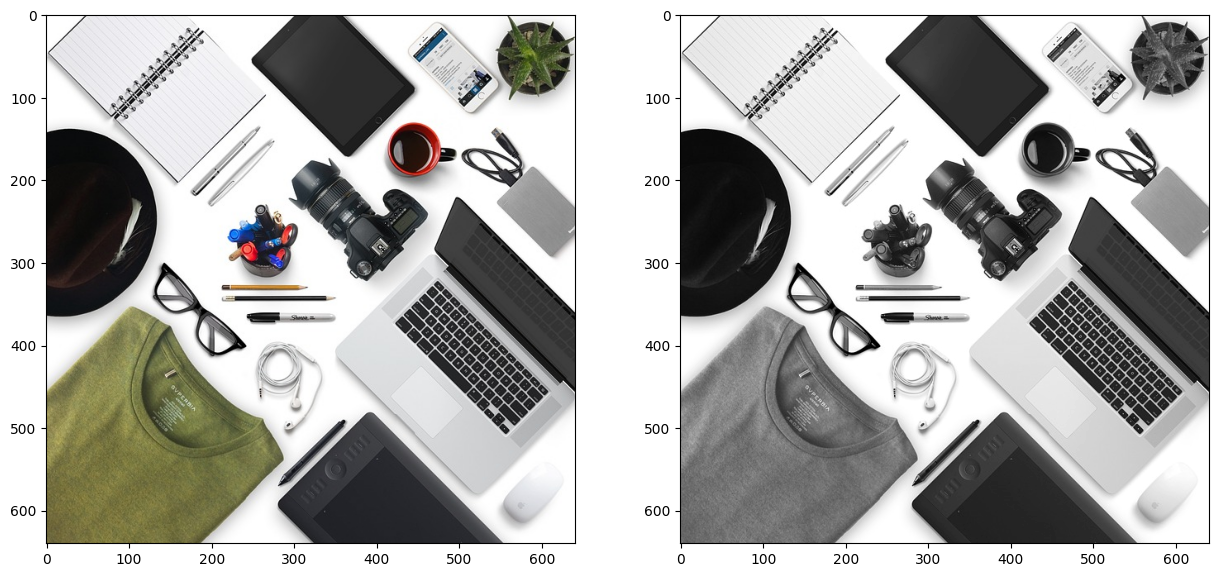

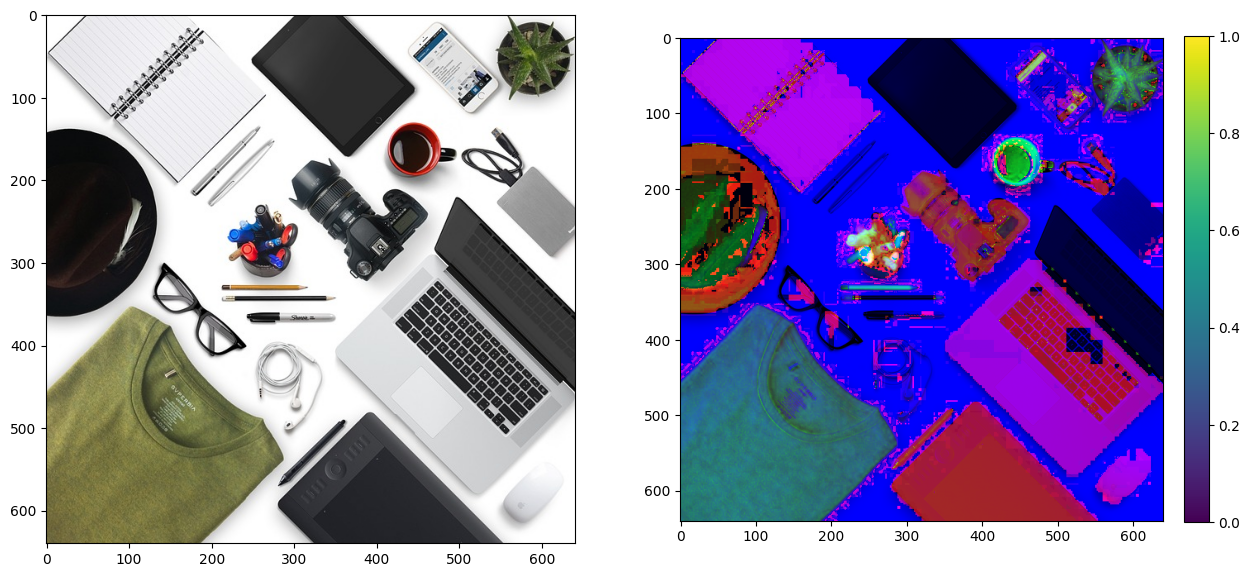

In [31]:
# Importing Necessary Libraries
from skimage.color import rgb2gray, rgb2hsv
 
gray_img = rgb2gray(original_image)
hsv_img = rgb2hsv(original_image)

plot_image_comparision(original_image, gray_img, draw_colorbar=False)
plot_image_comparision(original_image, hsv_img, draw_colorbar=True)


## Segmentação por limiarização (Thresholding)

Divide uma imagem em regiões com base em um valor de limiar, onde os pixels acima do limiar são atribuídos a uma região e os pixels abaixo do limiar a outra. 
- É útil para segmentar objetos do fundo em imagens binárias.

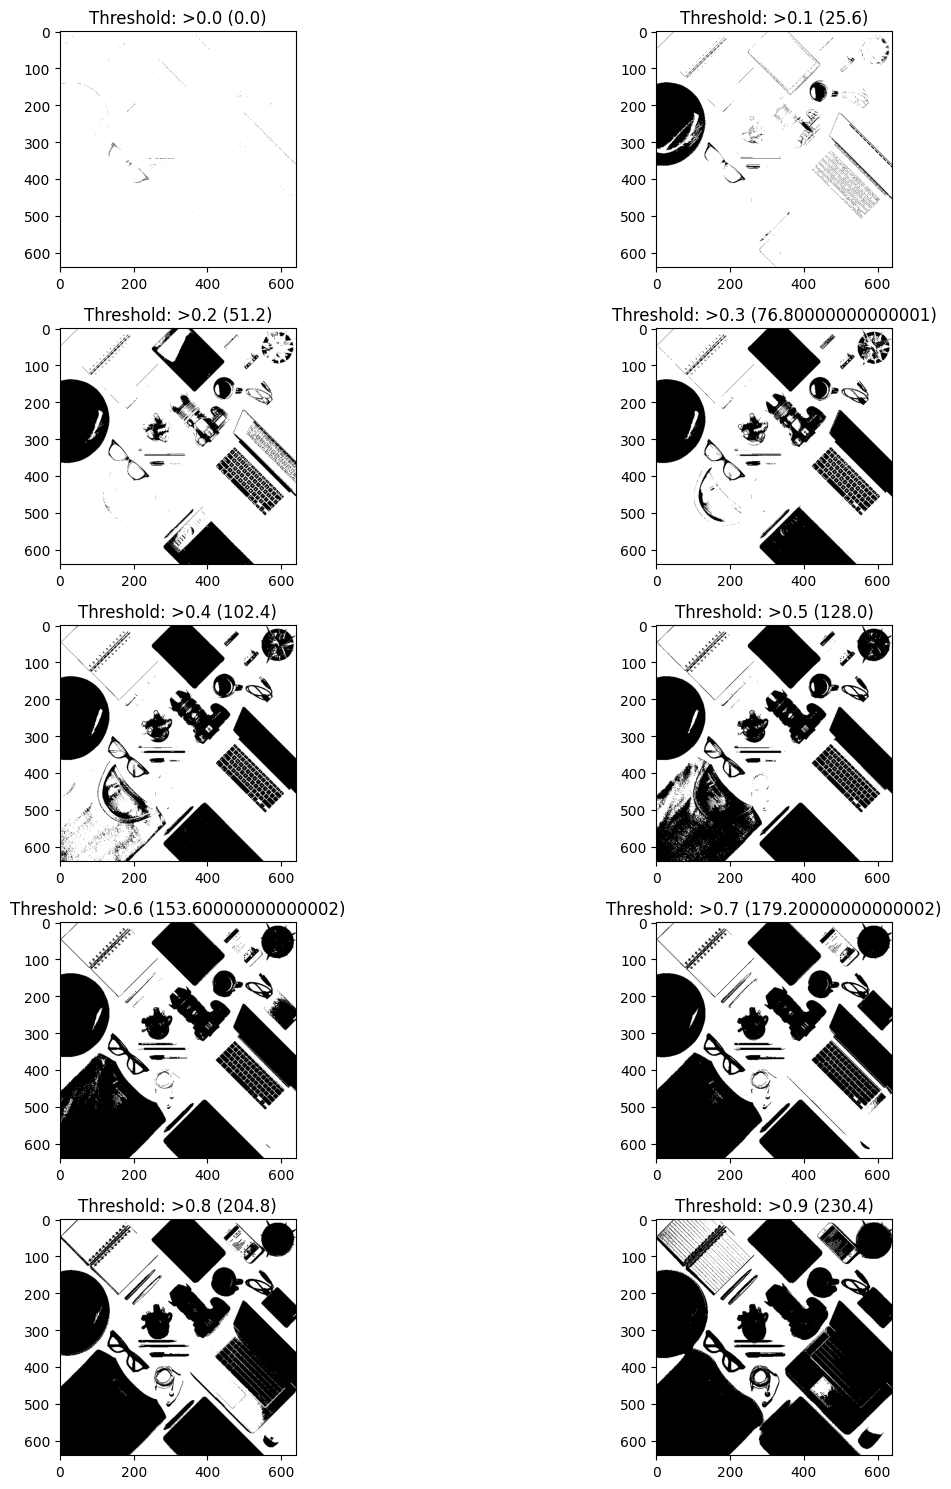

In [32]:
# Importing Necessary Libraries
from skimage import filters
from skimage.color import rgb2gray
 
gray_img = rgb2gray(original_image)
 
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
 
for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (gray_img > i*0.1)*1
  plt.subplot(5,2,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title(f"Threshold: >{str(round(i*0.1,1))} ({str(i*0.1*256)})")
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
   
plt.tight_layout()

- O limiar Niblack e sauvola são limiares locais que considera um limiar para cada pixel ou porção de pixels local
- Considera a média e o desvio padrão dos vizionhos com base em uma janela
- Excelente para OCR
- Excelente para imagens com cores contrastantes em diferentes regiões, porém com detalhes locais

In [33]:
window_size = 15

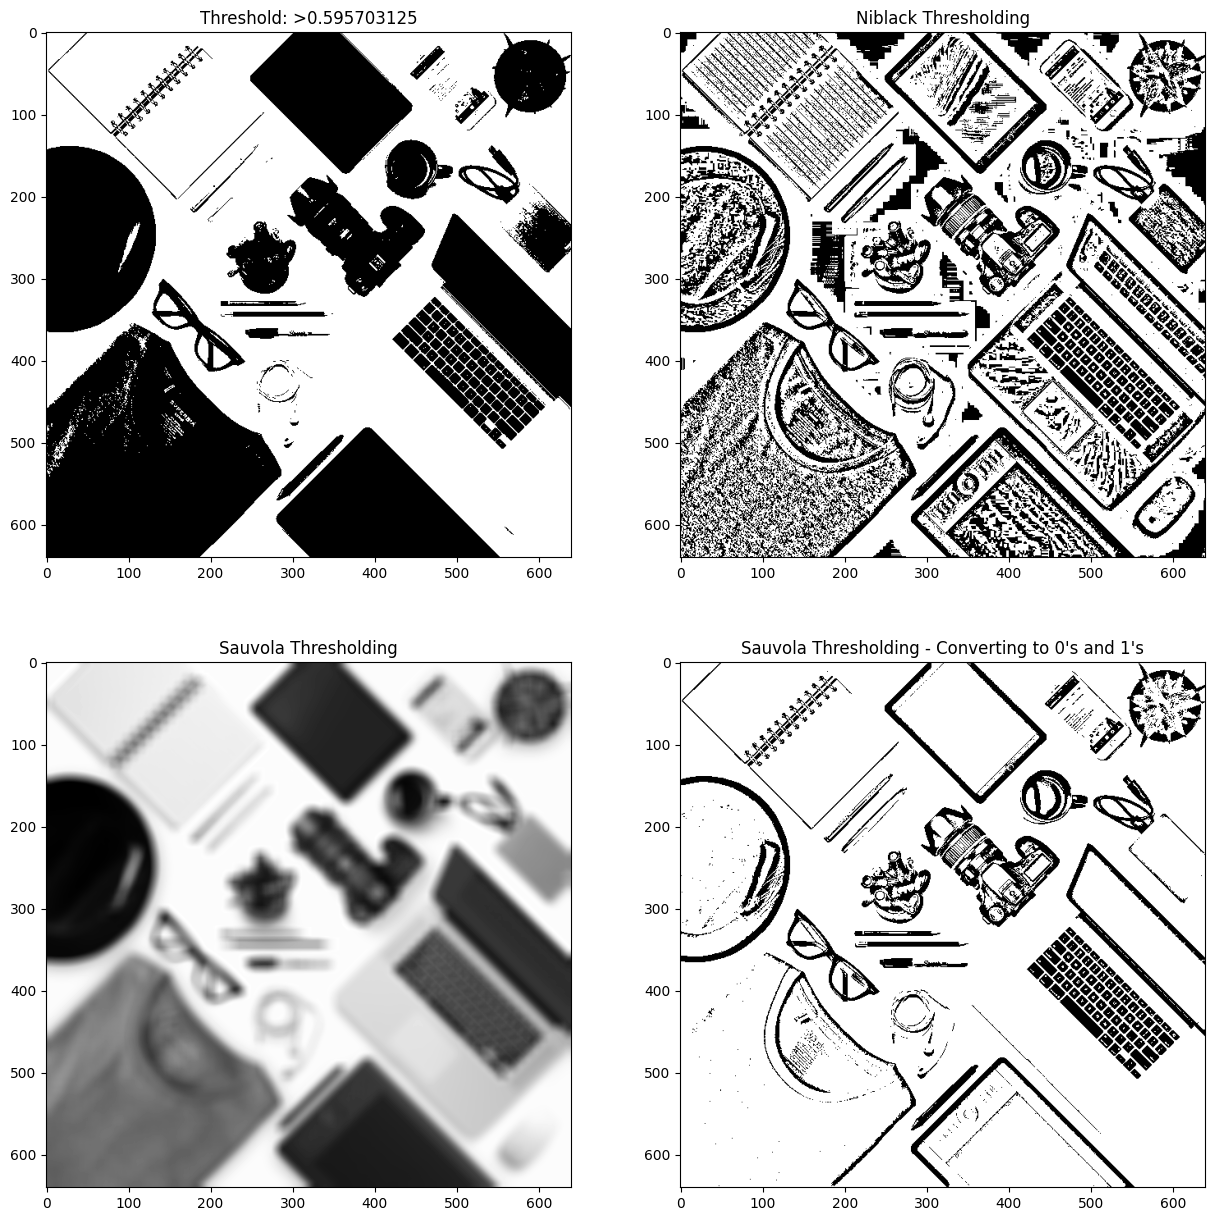

In [34]:
# Importing necessary libraries
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))

gray_img = rgb2gray(original_image)
 
# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_img)
 
# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_img > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
 
# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_img, window_size=window_size)
 
# Computing binarized values using the obtained 
# threshold
binarized_coffee = (gray_img > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
 
# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_img, window_size=window_size)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
 
# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")
 
# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_img > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
 
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")

## Segmentação por contorno ativo (Active Contour)

- Envolve a definição de uma curva fechada (contorno) que se ajusta ao redor dos objetos na imagem.
- Abordagem de segmentação que utiliza forças e restrições de energia para separar os pixels de interesse do resto da imagem
- Pode ser utilizado quando não se tem bons resultados com os métodos anteriores. O método de segmentação por contorno ativo não depende dos contornos da imagem

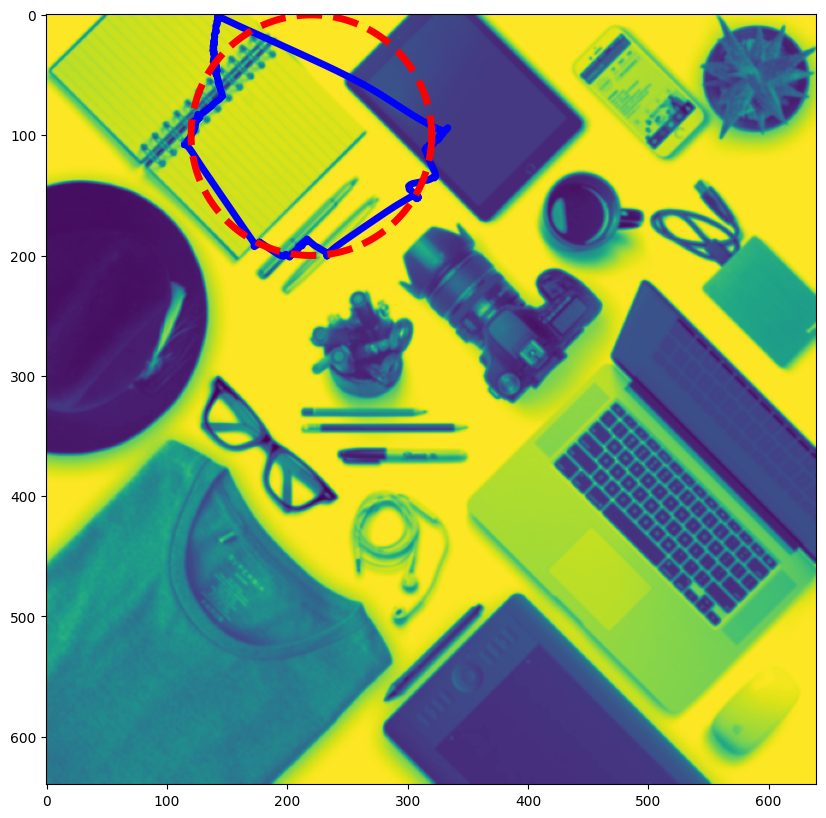

In [35]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour
 
# Sample Image of scikit-image package
gray_img = rgb2gray(original_image)
 
# Applying Gaussian Filter to remove noise
gray_img_noiseless = gaussian(gray_img, 1)
 
# Localising the circle's center at 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))
 
# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T
 
# Computing the Active Contour for the given image
img_snake = active_contour(gray_img_noiseless,
                                 snake)
 
fig = plt.figure(figsize=(10, 10))
 
# Adding subplots to display the markers
ax = fig.add_subplot(111)
 
# Plotting sample image
ax.imshow(gray_img_noiseless)
 
# Plotting the face boundary marker
ax.plot(img_snake[:, 0],
        img_snake[:, 1], 
        '-b', lw=5)
 
# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

### Chan-Vese Segmentation

O método de segmentação iterativo Chan-Vese divide uma imagem em dois grupos com a menor variância intra-classe.

Syntax : skimage.segmentation.chan_vese(image)


Parameters :
- image : An image
- mu : Weight – Edge Length
- lambda1 : Weight – Difference from average
- tol : Tolerance of Level set variation
- max_num_iter : Maximum number of iterations
- extended_output : Tuple of 3 values is returned


Return :
- segmentation : Segmented Image
- phi : Final level set
- energies: Shows the evolution of the energy

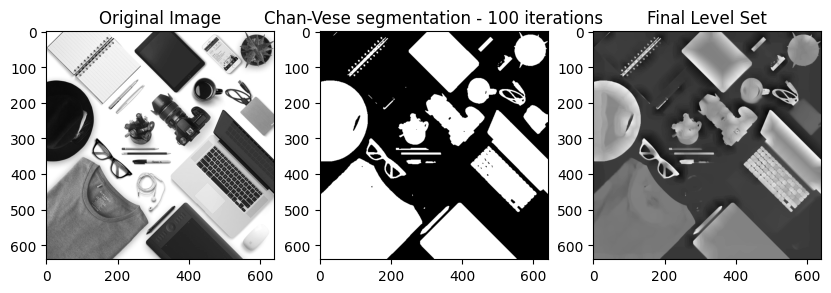

In [36]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.segmentation import chan_vese
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
 
gray_img = rgb2gray(original_image)
 
# Computing the Chan VESE segmentation technique
chanvese_gray_img = chan_vese(gray_img,
                                    max_num_iter=100,
                                    extended_output=True)
 
ax = axes.flatten()
 
# Plotting the original image
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Original Image")
 
# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_img[0], cmap="gray")
title = "Chan-Vese segmentation - 100 iterations"
format(len(chanvese_gray_img[2]))
 
ax[1].set_title(title)
 
# Plotting the final level set
ax[2].imshow(chanvese_gray_img[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show()

## Segmentação não supervisionada

- Agrupa pixels semelhantes em regiões maiores com base em critérios como cor, textura e proximidade espacial.

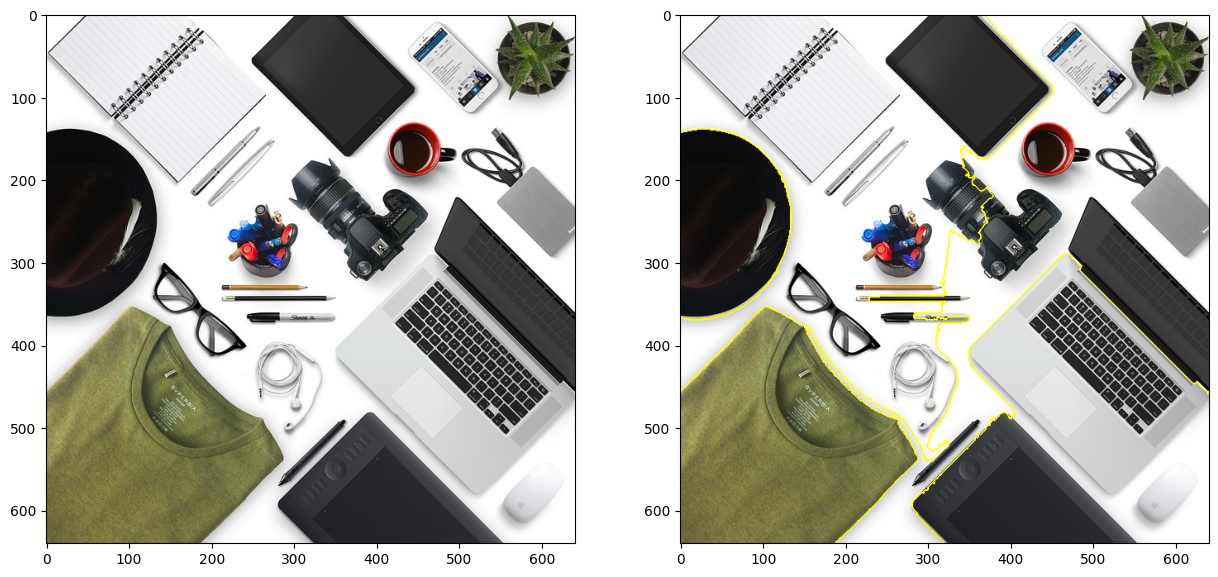

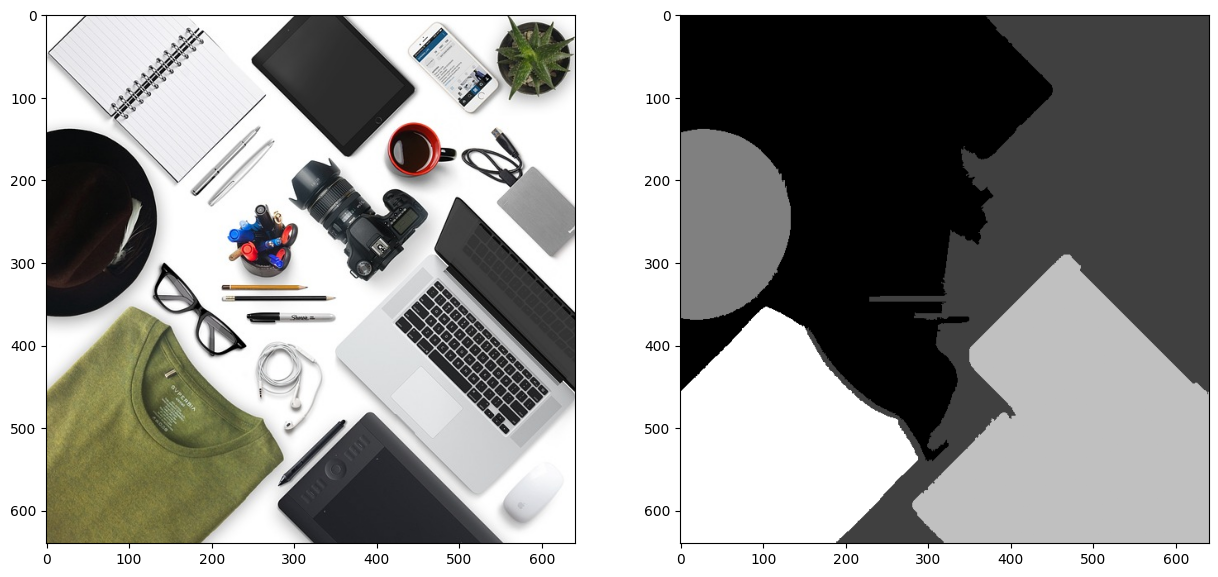

In [50]:
n_segments=100
compactness=1

# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries
  
# Applying SLIC segmentation
# for the edges to be drawn over
img_segments = slic(original_image,
                          n_segments=n_segments,
                          compactness=compactness)

plot_image_comparision(original_image, 
                       mark_boundaries(original_image, img_segments))
plot_image_comparision(original_image, img_segments)

### Simple Linear Iterative Clustering

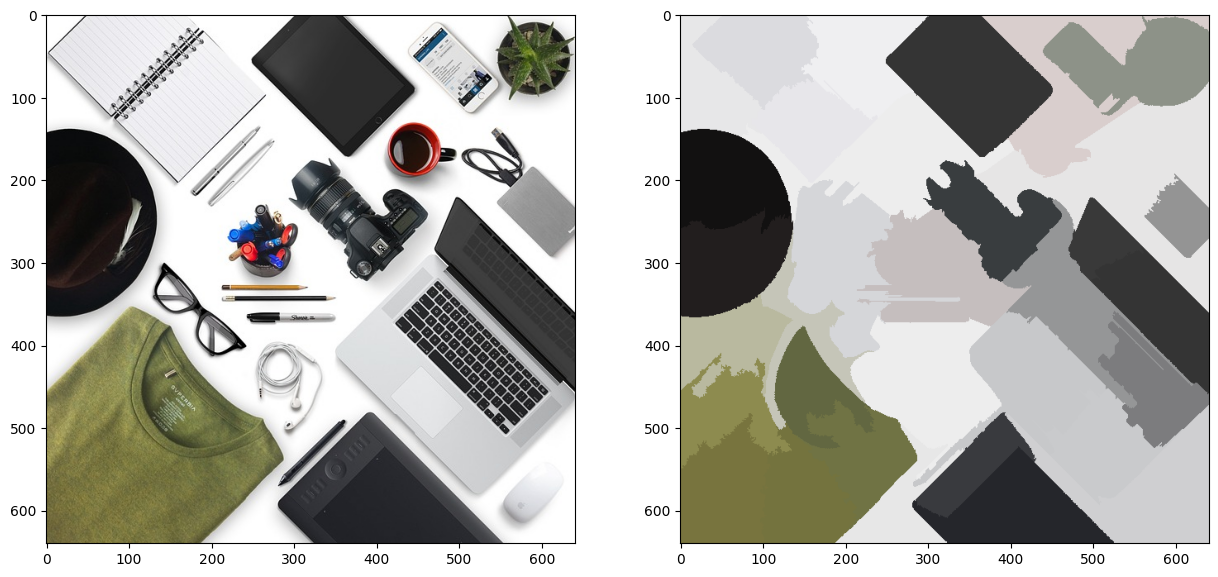

In [38]:
n_segments=50 # Number of labels
compactness=10 # Balances color and space proximity.

# Importing required libraries
from skimage.segmentation import slic
from skimage.color import label2rgb
  
# Applying Simple Linear Iterative
# Clustering on the image
# - 50 segments & compactness = 10
img_segments = slic(original_image,
                          n_segments=50,
                          compactness=10)

segmented_img = label2rgb(img_segments,
                     original_image,
                     kind = 'avg')

plot_image_comparision(original_image, segmented_img)

### Felzenszwalb’s Segmentation 

<Figure size 1500x1500 with 0 Axes>

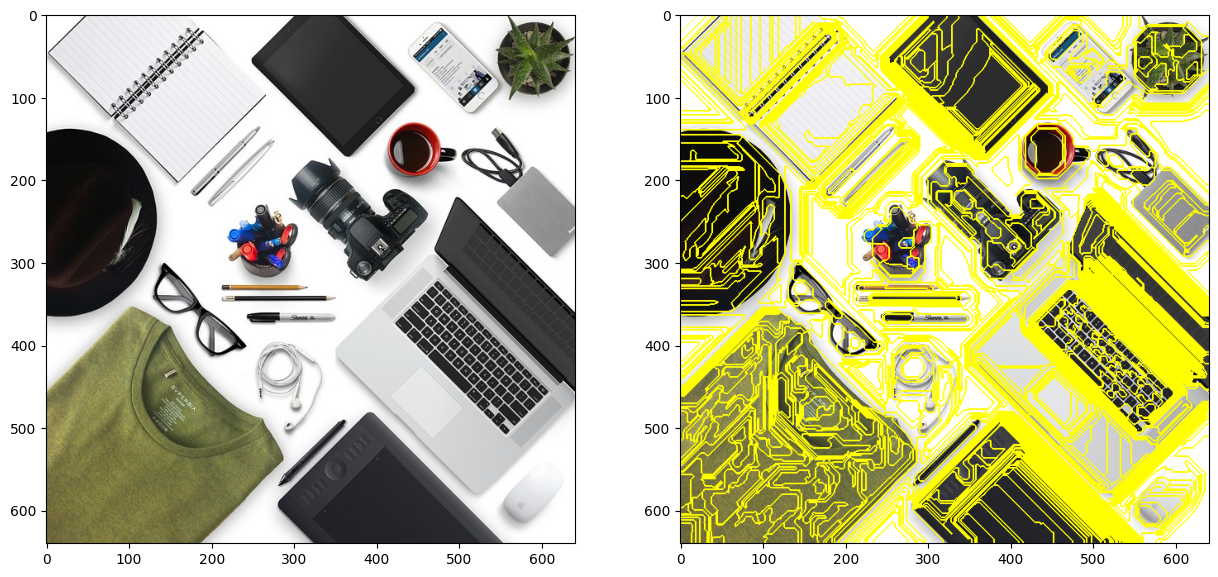

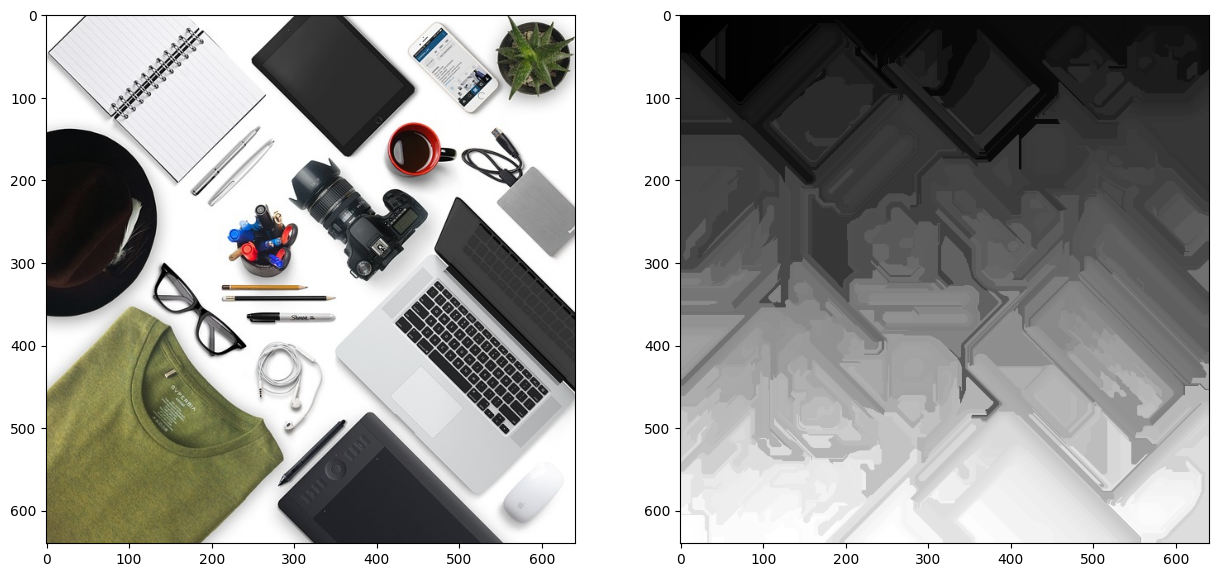

In [39]:
scale = 2 # Higher value – larger clusters
sigma = 5 # Width of Gaussian kernel
min_size = 100 # Minimum component size

# Importing the required libraries
from skimage.segmentation import felzenszwalb, mark_boundaries
 
# Setting the figure size as 15, 15
plt.figure(figsize=(15,15))
 
# computing the Felzenszwalb's
# Segmentation with sigma = 5 and minimum
# size = 100
img_segments = felzenszwalb(original_image,
                                  scale = scale,
                                  sigma=sigma,
                                  min_size=min_size)

plot_image_comparision(original_image, 
                       mark_boundaries(original_image, img_segments))
plot_image_comparision(original_image, img_segments)

## Export notebook

In [40]:
# !Powershell.exe -Command "jupyter nbconvert --to html --template pj types_of_segmentations.ipynb"

In [41]:
# shutil.move('types_of_segmentations.html', f'../output/notebooks/{img_name}.html')